##  Seattle Crime Data Coding Challenge
- This coding challenge is not open ended.
- This is to ensure that you practice some basic data analysis skill.

In [1]:
%matplotlib inline
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crimes = pd.read_csv('./Crime_Data.csv')
print(crimes.shape)
crimes.columns

(509236, 11)


Index(['Report Number', 'Occurred Date', 'Occurred Time', 'Reported Date',
       'Reported Time', 'Crime Subcategory', 'Primary Offense Description',
       'Precinct', 'Sector', 'Beat', 'Neighborhood'],
      dtype='object')

In [3]:
crimes.Precinct.unique()

array(['SOUTHWEST', 'WEST', 'NORTH', 'UNKNOWN', 'EAST', 'SOUTH', nan],
      dtype=object)

In [4]:
crimes.Beat.unique()

array(['W1', 'D1', 'L1', 'N3', 'Q2', 'J3', 'N2', 'Q3', nan, 'N1', 'E1',
       'B2', 'B1', 'W2', 'B3', 'M1', 'Q1', 'R2', 'G3', 'U3', 'L3', 'W3',
       'L2', 'G1', 'D2', 'D3', 'E3', 'J2', 'U2', 'K2', 'E2', 'O3', 'S1',
       'U1', 'J1', 'S2', 'M2', 'O1', 'S3', 'C1', 'O2', 'M3', 'F1', 'R3',
       'C2', 'C3', 'G2', 'K1', 'K3', 'F3', 'R1', 'W', 'S', 'F2', 'H1',
       'X9', 'CS', 'INV', 'CTY', 'LAPT', 'N', 'DET', 'SS', 'WS', 'K'],
      dtype=object)

## Question
- Report the names of the columns which have missingness

In [5]:
nans = []
for column in crimes.columns:
    uniques = crimes[column].unique()
    isnan = pd.isna(uniques)
    for result in isnan:
        if result:
            nans.append(column)
print(nans)

['Occurred Date', 'Occurred Time', 'Reported Time', 'Crime Subcategory', 'Precinct', 'Sector', 'Beat']


## Question: 
- Report the numbers of distinct **Reported Dates** and distinct **Occurred Dates**, respectively.
- Convert the **Occurred Date** + **Occurred Time**, **Reported Date** + **Reported Time** from strings to datetime objects

- **Hint**: The panadas function **pd.to_datetime** can help

- The loaded Occurred/Reported Time appears to be a float like '1930.0'. This should be interpreted as '19:30:00' eventually
- Those time stamp like '30.0', '20.0' should be treated as missing values 

In [6]:
import datetime

print(f'# of distinct Reported Dates: {len(crimes["Reported Date"].unique())}')
print(f'# of distinct Occurred Dates: {len(crimes["Occurred Date"].unique())}')
      
o_date = crimes[2:3]['Occurred Date'][2]
o_time = crimes[2:3]['Occurred Time']
d_string = "".join(o_date.split('/'))
t_string = str(int(o_time))
dt_string = d_string + t_string
print(dt_string)
print(pd.to_datetime(dt_string, format='%m%d%Y%H%M', errors='coerce'))
      
def to_dt(i_date, i_time):
    if pd.isna(i_date) or pd.isna(i_time):
        return pd.NaT
    d_string = "".join(i_date.split('/'))
    t_string = str(int(i_time)).zfill(4)
    dt_string = d_string + t_string
    return pd.to_datetime(dt_string, format='%m%d%Y%H%M', errors='coerce')
      
crimes['Occurred Datetime'] = crimes.apply(lambda x: to_dt(x['Occurred Date'], x['Occurred Time']), axis=1)
crimes['Reported Datetime'] = crimes.apply(lambda x: to_dt(x['Reported Date'], x['Reported Time']), axis=1)
crimes.head()

# of distinct Reported Dates: 4186
# of distinct Occurred Dates: 4508
072520061536
2006-07-25 15:36:00


,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00


## Question: 
- Report the statistics (i.e. mean and std) of time gaps between **Reported Date** vs **Occurred Date**.
- Report the median lag of reporting time from event occurrance time.
- Why do the **mean lag** and the **median lag** differ so much?
- Plot the histogram of the distribution of **days**, how would you deal with the outliers?

In [7]:
s = crimes['Reported Datetime'] - crimes['Occurred Datetime']
s.describe()

count                      509234
mean       7 days 15:37:55.840104
std      139 days 01:11:36.271945
min             -1 days +02:16:00
25%               0 days 00:03:00
50%               0 days 04:40:00
75%               0 days 20:49:00
max           36525 days 00:00:00
dtype: object

- The median lag is **4 hours 40 minutes**.
- The raw histogram below looks trivial as there is some outlier in the data.

<Figure size 2880x2880 with 0 Axes>

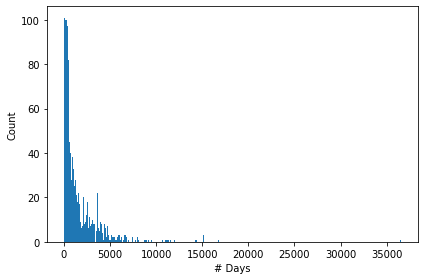

In [9]:
s_clean = s.dropna()
s_frame = { 'Lag': s_clean }
sf = pd.DataFrame(s_frame)

hist = sf.groupby(sf['Lag'].dt.days).count()

plt.figure(figsize=(40, 40))
x = hist.index
y = hist.Lag.values
n_bins = 365
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(x, bins=n_bins)
axs.set_xlabel("# Days")
axs.set_ylabel("Count")
plt.show()

In [10]:
# I would put all outliers with days > 365 (e.g. 1 year) in their own bin.

In [11]:
###

## Question
- What time period has more prevalent crime occurance?
- In this question, we should treat any invalid/missing time value as missing and avoid to impute them.
- We group the 24 hours window into 6 groups '12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am'.

In [12]:
timef = crimes[['Reported Datetime']]

hist = timef.groupby(timef['Reported Datetime'].dt.hour).count()
hist.index = pd.to_numeric(hist.index, downcast='integer')
hist['Count'] = hist['Reported Datetime'].apply(lambda x: int(x))
hist

windowsf = pd.DataFrame()
windowsf['12am-4am'] = pd.Series([sum(hist[0:4]['Count'])])
windowsf['4am-8am'] = pd.Series([sum(hist[4:8]['Count'])])
windowsf['8am-12pm'] = pd.Series([sum(hist[8:12]['Count'])])
windowsf['12pm-4pm'] = pd.Series([sum(hist[12:16]['Count'])])
windowsf['4pm-8pm'] = pd.Series([sum(hist[16:20]['Count'])])
windowsf['8pm-12am'] = pd.Series([sum(hist[20:]['Count'])])
windowsf

,12am-4am,4am-8am,8am-12pm,12pm-4pm,4pm-8pm,8pm-12am
0,42608,38204,107201,124133,112239,84849


- We round the hour to the next full hour modulo 24

In [13]:
# plt.figure(figsize=(40, 40))
# x = hist.index
# n_bins = 24
# fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# axs.hist(x, bins=n_bins)
# ax.set_xlabel("Hour")
# ax.set_ylabel("Count")
# plt.show()

## Conclusion
- Without conditioning on the crime types, the **4-8pm**, **8pm-12am** are the most prevalent time window for crimes.
- **12pm-4pm** follows.  Most of the crimes happen during the **12pm-12am** cycle and particularly **after the dark**.
- More insight should be gained when we combine the above analysis with the crime types.

## Question:
- Find all the crime subcategories in the data set and report the sample counts/subcategory.
- Which three subcategories have the top three event counts?

In [14]:
crimes['Crime Subcategory'].value_counts()

CAR PROWL                              144766
THEFT-ALL OTHER                         52796
THEFT-SHOPLIFT                          47257
BURGLARY-RESIDENTIAL                    45909
MOTOR VEHICLE THEFT                     42580
BURGLARY-COMMERCIAL                     22720
THEFT-BUILDING                          20786
NARCOTIC                                17060
TRESPASS                                16591
AGGRAVATED ASSAULT                      15070
DUI                                     12464
ROBBERY-STREET                          11621
THEFT-BICYCLE                           10853
BURGLARY-RESIDENTIAL-SECURE PARKING      8423
AGGRAVATED ASSAULT-DV                    6725
FAMILY OFFENSE-NONVIOLENT                6698
SEX OFFENSE-OTHER                        6179
WEAPON                                   4836
ROBBERY-COMMERCIAL                       4467
PROSTITUTION                             3579
RAPE                                     1922
LIQUOR LAW VIOLATION              

- **Car Prowl** **Theft-All Other**, **Theft-Shoplift** are the top three subcategories.

## Grouping Subcategories into Eight Major Crime Types

- The crime subcategories are too fine-grained for our analysis.
- We regroup several subcategories together into $8$ major categories
- Thefts
- Burglary
- Robbery
- Alcohol_Drug
- Sex_Related
- Homicide
- Misc

In [15]:
subcats = crimes['Crime Subcategory'].value_counts()
thefts = subcats['CAR PROWL'] + subcats['THEFT-ALL OTHER'] + subcats['THEFT-SHOPLIFT'] + subcats['MOTOR VEHICLE THEFT'] + subcats['THEFT-BUILDING'] + subcats['THEFT-BICYCLE']
burglary = subcats['BURGLARY-RESIDENTIAL'] + subcats['BURGLARY-COMMERCIAL'] + subcats['BURGLARY-RESIDENTIAL-SECURE PARKING'] + subcats['BURGLARY-COMMERCIAL-SECURE PARKING']
robbery = subcats['ROBBERY-STREET'] + subcats['ROBBERY-COMMERCIAL'] + subcats['ROBBERY-RESIDENTIAL']
alcohol_drug = subcats['NARCOTIC'] + subcats['DUI'] + subcats['LIQUOR LAW VIOLATION']
sex_related = subcats['SEX OFFENSE-OTHER'] + subcats['PROSTITUTION'] + subcats['RAPE'] + subcats['PORNOGRAPHY']
homicide = subcats['HOMICIDE']
misc = sum(subcats) - sum([thefts, burglary, robbery, alcohol_drug, sex_related, homicide])
major_crimes = {"Thefts": thefts, "Burglary": burglary, "Robbery": robbery, "Alcohol_Drug": alcohol_drug, "Sex_Related": sex_related, "Homicide": homicide, "Misc": misc}
major_crimes

{'Thefts': 319038,
 'Burglary': 78174,
 'Robbery': 17125,
 'Alcohol_Drug': 31153,
 'Sex_Related': 11856,
 'Homicide': 271,
 'Misc': 51357}

## Question: Neighborhood Crime Percentages 
- Report the event counts of each major crime type and report the ranking of **robbery**.

**Definition**: In the following, the major crime percentage refers to the percentage 
    of a single major crime type among the **8** types in a neighorhood.
    
- Which neighborhood has the highest **homicide** percentage?
- Which neighborhood has the highest **burglary** percentage?
- Which neighborhood has the highest **robbery** percentage?

## Step 1:
- Construct a dictionary (mapping) from the subcategories to the corresponding major crime types 
- For example, we would like to map **CAR PROWL**, **MOTOR VEHICLE THEFT**, ... to 'thefts'.
- We would like to map **ROBBERY-STREET**, **ROBBERY-RESIDENTIAL**,... to 'robbery', etc.

In [16]:
major_mapping = { "Thefts": ['CAR PROWL','THEFT-ALL OTHER','THEFT-SHOPLIFT','MOTOR VEHICLE THEFT','THEFT-BUILDING','THEFT-BICYCLE'],
 "Burglary": ['BURGLARY-RESIDENTIAL','BURGLARY-COMMERCIAL','BURGLARY-RESIDENTIAL-SECURE PARKING','BURGLARY-COMMERCIAL-SECURE PARKING'],
 "Robbery": ['ROBBERY-STREET', 'ROBBERY-COMMERICAL', 'ROBBERY-RESIDENTIAL'],
 "Alcohol_Drug": ['NARCOTIC', 'DUI', 'LIQUOR LAW VIOLATION'],
 "Sex_Related": ['SEX OFFENSE-OTHER', 'PROSTITIUTION', 'RAPE', 'PORNOGRAPHY'],
 "Homicide": ['HOMICIDE'] }

- Create a new column called (crime) classification by mapping using a lambda function constructed by the above
mapping dictionary.

In [17]:
def to_major(sub):
    for key, val in major_mapping.items():
        if sub in val:
            return key
    return 'Misc'

crimes["Classification"] = crimes['Crime Subcategory'].apply(lambda x: to_major(x))
crimes.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime,Classification
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00,Thefts
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00,Thefts
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00,Sex_Related
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00,Thefts
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00,Thefts


In [18]:
hoods = crimes["Neighborhood"].unique()
hoods

array(['ALKI', 'BELLTOWN', 'NORTHGATE', 'QUEEN ANNE', 'GREENWOOD',
       'SLU/CASCADE', 'LAKECITY', 'UNKNOWN', 'BITTERLAKE', 'CAPITOL HILL',
       'BALLARD SOUTH', 'ALASKA JUNCTION', 'WALLINGFORD',
       'DOWNTOWN COMMERCIAL', 'MAGNOLIA', 'MOUNT BAKER', 'MADRONA/LESCHI',
       'SANDPOINT', 'FREMONT', 'MORGAN', 'FIRST HILL', 'BALLARD NORTH',
       'UNIVERSITY', 'PIONEER SQUARE', 'PHINNEY RIDGE', 'GEORGETOWN',
       'NEW HOLLY', 'ROOSEVELT/RAVENNA', 'BRIGHTON/DUNLAP', 'SODO',
       'RAINIER BEACH', 'NORTH ADMIRAL', 'MONTLAKE/PORTAGE BAY',
       'MILLER PARK', 'HIGH POINT', 'HILLMAN CITY', 'RAINIER VIEW',
       'SOUTH PARK', 'HIGHLAND PARK', 'GENESEE', 'NORTH BEACON HILL',
       'MADISON PARK', 'EASTLAKE - WEST', 'COLUMBIA CITY', 'PIGEON POINT',
       'COMMERCIAL DUWAMISH', 'SOUTH BEACON HILL', 'NORTH DELRIDGE',
       'MID BEACON HILL', 'SOUTH DELRIDGE', 'CENTRAL AREA/SQUIRE PARK',
       'EASTLAKE - EAST', 'JUDKINS PARK/NORTH BEACON HILL',
       'CLAREMONT/RAINIER VISTA', 'L

In [19]:
test = crimes[crimes["Neighborhood"] == hoods[0]]["Classification"].value_counts()
test["Neighborhood"] = hoods[0]

crime_cols = list(major_mapping.keys())
crime_cols.append("Misc")

nf_data = []
for hood in hoods:
    hood_series = crimes[crimes["Neighborhood"] == hood]["Classification"].value_counts()
    hood_series["Neighborhood"] = hood
    nf_data.append(hood_series)
nf = pd.DataFrame(data=nf_data, index=range(0, len(hoods)))
nf = nf.fillna(0)
for col in ['Robbery', 'Homicide']:
    nf[col] = nf[col].apply(lambda x: int(x))
nf['Total'] = nf.sum(axis=1)
nf['% Homicide'] = nf['Homicide'] / nf['Total'] * 100
nf['% Burglary'] = nf['Burglary'] / nf['Total'] * 100
nf['% Robbery'] = nf['Robbery'] / nf['Total'] * 100
nf

,Thefts,Burglary,Misc,Alcohol_Drug,Robbery,Sex_Related,Homicide,Neighborhood,Total,% Homicide,% Burglary,% Robbery
0,1599,447,213,112,37,33,3,ALKI,2444,0.122750,18.289689,1.513912
1,9937,1281,1543,1698,415,184,10,BELLTOWN,15068,0.066366,8.501460,2.754181
2,19515,3877,4425,1202,605,384,8,NORTHGATE,30016,0.026652,12.916445,2.015592
3,18255,4967,1717,1130,232,286,10,QUEEN ANNE,26597,0.037598,18.675039,0.872279
4,6969,1861,1326,596,195,164,4,GREENWOOD,11115,0.035987,16.743140,1.754386
5,14402,2463,3111,1711,617,412,10,SLU/CASCADE,22726,0.044002,10.837807,2.714952
6,7525,2684,1790,631,280,260,2,LAKECITY,13172,0.015184,20.376556,2.125721
7,1231,110,634,585,136,562,0,UNKNOWN,3258,0.000000,3.376304,4.174340
8,5658,2066,1210,427,185,182,4,BITTERLAKE,9732,0.041102,21.228935,1.900945
9,18028,4045,4227,2248,850,510,10,CAPITOL HILL,29918,0.033425,13.520289,2.841099


In [25]:
# Highest Homicide percentage

hpf = nf.sort_values('% Homicide', axis=0, ascending=False)
print(hpf[:1]["Neighborhood"])

# Highest Burglary percentage

hbf = nf.sort_values('% Burglary', axis=0, ascending=False)
print(hbf[:1]["Neighborhood"])

# Highest Robbery percentage

hrf = nf.sort_values('% Robbery', axis=0, ascending=False)
print(hrf[:1]["Neighborhood"])

28    BRIGHTON/DUNLAP
Name: Neighborhood, dtype: object
46    SOUTH BEACON HILL
Name: Neighborhood, dtype: object
26    NEW HOLLY
Name: Neighborhood, dtype: object


## Question
- In the following, restrict to crime events occurred in-between **2008-2018**.
- Report the crime event counts in terms of **occurred years**. 
- Which year has the lowest and highest crime event counts, respectively?
- Report the crime event counts in terms of **occurred year-quarters**.
- Which **year-quarter** has the lowest and highest crime event counts, respectively?

- To answer the above questions, create two columns named **Year**, **Year_Quarter**, respectively.

In [74]:
crimes["Quarter"] = crimes["Occurred Datetime"].apply(lambda x: x.quarter)

In [75]:
crimes["Year"] = crimes["Occurred Datetime"].apply(lambda x: x.year)
yf = crimes.dropna(subset=['Year', 'Quarter'])
yf.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime,Classification,Year,Quarter
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00,Thefts,2001.0,4.0
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00,Thefts,2004.0,2.0
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00,Sex_Related,2006.0,3.0
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00,Thefts,2007.0,3.0
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00,Thefts,2007.0,3.0


- Select years to be within **2008** to **2018**

In [60]:
yf.loc[:, 'Year'] = yf['Year'].apply(lambda x: int(x))
yf = yf[(yf.Year > 2007) & (yf.Year < 2019)]
yf.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime,Classification,Year
11,2008000013991,01/01/2008,30.0,01/11/2008,1753.0,CAR PROWL,THEFT-CARPROWL,NORTH,N,N1,BITTERLAKE,2008-01-01 00:30:00,2008-01-11 17:53:00,Thefts,2008
12,20080000474,01/01/2008,30.0,01/01/2008,913.0,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E1,CAPITOL HILL,2008-01-01 00:30:00,2008-01-01 09:13:00,Thefts,2008
13,2008000060,01/01/2008,10.0,01/01/2008,10.0,DUI,DUI-LIQUOR,WEST,Q,Q3,SLU/CASCADE,2008-01-01 00:10:00,2008-01-01 00:10:00,Alcohol_Drug,2008
14,200800002278,01/02/2008,2000.0,01/02/2008,2000.0,NARCOTIC,NARC-POSSESS-COCAINE,WEST,D,D1,BELLTOWN,2008-01-02 20:00:00,2008-01-02 20:00:00,Alcohol_Drug,2008
15,200800008276,01/04/2008,1100.0,01/07/2008,1602.0,CAR PROWL,THEFT-AUTOACC,WEST,Q,Q2,QUEEN ANNE,2008-01-04 11:00:00,2008-01-07 16:02:00,Thefts,2008


In [71]:
histg = yf.groupby('Year')
# histg.first()
histg.get_group(2008)['Classification'].value_counts()

hist_s = []
years = []

for name, group in histg:
    hist_s.append(group['Classification'].value_counts())
    years.append(name)
    
histf = pd.DataFrame(data=hist_s, index=years)
histf

,Thefts,Burglary,Misc,Alcohol_Drug,Robbery,Sex_Related,Homicide
2008,26479,6376,4194,3772,1229,714,29
2009,28397,6566,4441,3597,1437,596,21
2010,26882,6402,4647,3680,1117,604,19
2011,25393,6758,4245,3122,1131,625,23
2012,25694,6527,4086,2866,1158,652,24
2013,29566,7265,4282,2485,1260,672,19
2014,33597,7109,4784,1947,1172,688,23
2015,30207,7553,5930,2162,1090,724,24
2016,30944,7518,6566,2269,1039,855,19
2017,30197,7742,7830,2660,958,906,28


In [72]:
histf['Total'] = histf.sum(axis=1)
histf = histf.sort_values('Total', axis=0, ascending=False)
histf

,Thefts,Burglary,Misc,Alcohol_Drug,Robbery,Sex_Related,Homicide,Total
2018,30398,7993,8170,2489,1015,949,32,51046
2017,30197,7742,7830,2660,958,906,28,50321
2014,33597,7109,4784,1947,1172,688,23,49320
2016,30944,7518,6566,2269,1039,855,19,49210
2015,30207,7553,5930,2162,1090,724,24,47690
2013,29566,7265,4282,2485,1260,672,19,45549
2009,28397,6566,4441,3597,1437,596,21,45055
2010,26882,6402,4647,3680,1117,604,19,43351
2008,26479,6376,4194,3772,1229,714,29,42793
2011,25393,6758,4245,3122,1131,625,23,41297


In [91]:
histq = yf.groupby('Quarter')
# histq.first()
# histq.get_group(1.0)['Classification'].value_counts()

histq_s = []
quarters = []
qmap = {
    1.0: "winter",
    2.0: "spring",
    3.0: "summer",
    4.0: "autumn"
}


for name, group in histq:
    histq_s.append(group['Classification'].value_counts())
    quarters.append(qmap[name])
    
histq_f = pd.DataFrame(data=histq_s, index=quarters)
histq_f

,Thefts,Burglary,Misc,Alcohol_Drug,Robbery,Sex_Related,Homicide
winter,76171,18665,14281,8459,2874,2025,65
spring,79742,19041,15096,7690,3211,2109,64
summer,81640,19588,16061,7604,3366,2199,77
autumn,81484,20880,14227,7400,3207,1943,65


## Question (continuation)
- In terms of **winter**, **spring**, **summer**, and **autumn** quarters, what is the average quarterly crime count in each quarter?
- Display your insight using a bar plot.

In [96]:
qcc = histq_f.apply(lambda x: x)
qcc['Total'] = histq_f.sum(axis=1)
qcc['Average'] = qcc.Total.apply(lambda x: x / len(years))
# qcc
qplot = qcc['Average']
qplot

winter    11140.000000
spring    11541.181818
summer    11866.818182
autumn    11746.000000
Name: Average, dtype: float64

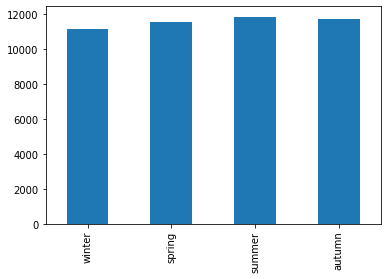

In [98]:
qplot.plot.bar(x=qplot.index)

## Conclusion 

- On average the **winter** quarter has the lowest crime count while the **summer** quarter has the highest crime count.
- To make sure that this observation is sound, we perform a one-way **ANOVA** F-test on these populations 

In [110]:
from scipy.stats import f_oneway
qff = pd.DataFrame(data=[qcc.loc['winter'], qcc.loc['summer']], index=['winter', 'summer'])
qff = qff.drop(['Total', 'Average'], axis=1)
qff

,Thefts,Burglary,Misc,Alcohol_Drug,Robbery,Sex_Related,Homicide
winter,76171.0,18665.0,14281.0,8459.0,2874.0,2025.0,65.0
summer,81640.0,19588.0,16061.0,7604.0,3366.0,2199.0,77.0


In [114]:
f_oneway(qff.Thefts, qff.Burglary, qff.Misc, qff.Alcohol_Drug, qff.Robbery, qff.Sex_Related, qff.Homicide)
# f_oneway(qff.loc['winter'], qff.loc['summer'])

F_onewayResult(statistic=616.2821884711417, pvalue=3.6180797265378507e-09)

## Summary 
- Notice that we compare the winter vs summer quarters only.  The **p-value** is slightly below the $5\%$ threshold.
- Based on $5\%$ condidence, we can reject the null hypothesis and accept the alternative. 
- Based on the current data, it seems that there is a significant difference between the winter vs summer crime counts.
- We may speculate that the weather has played an essential role here.
- If we test all four quarters together, the **p-value** would be in-significant. This indicates that the additional
**spring**, **autumn** quarters make the water muddy.

## Question
- Analyze the crime prevalence in terms of week days.
- Which weekday (Sunday, Monday, ....Saturday) has highest/lowest average daily crime count?

In [118]:
yf["Weekday"] = yf["Occurred Datetime"].apply(lambda x: x.day_name())
yf.head()

/Users/lvreynoso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,Occurred Datetime,Reported Datetime,Classification,Year,Quarter,Weekday
0,20110000389222,11/29/2001,1200.0,12/03/2011,1314.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W1,ALKI,2001-11-29 12:00:00,2011-12-03 13:14:00,Thefts,2001.0,4.0,Thursday
1,20160000201733,06/01/2004,0.0,06/07/2016,1126.0,THEFT-ALL OTHER,THEFT-OTH,WEST,D,D1,BELLTOWN,2004-06-01 00:00:00,2016-06-07 11:26:00,Thefts,2004.0,2.0,Tuesday
2,20060000308915,07/25/2006,1536.0,07/25/2006,1536.0,RAPE,RAPE-STRONGARM,NORTH,L,L1,NORTHGATE,2006-07-25 15:36:00,2006-07-25 15:36:00,Sex_Related,2006.0,3.0,Tuesday
3,2009000018704,09/30/2007,1530.0,01/15/2009,1820.0,THEFT-ALL OTHER,THEFT-OTH,NORTH,N,N3,NORTHGATE,2007-09-30 15:30:00,2009-01-15 18:20:00,Thefts,2007.0,3.0,Sunday
4,2008000054923,09/30/2007,0.0,02/11/2008,1532.0,THEFT-ALL OTHER,THEFT-BOAT,WEST,Q,Q2,QUEEN ANNE,2007-09-30 00:00:00,2008-02-11 15:32:00,Thefts,2007.0,3.0,Sunday


In [121]:
histw = yf.groupby('Weekday')
# histw.first()
# histw.get_group(1.0)['Classification'].value_counts()

histw_s = []
weekdays = []


for name, group in histw:
    histw_s.append(group['Classification'].value_counts())
    weekdays.append(name)
    
histw_f = pd.DataFrame(data=histw_s, index=weekdays)
histw_f

,Thefts,Burglary,Misc,Alcohol_Drug,Robbery,Sex_Related,Homicide
Friday,49261,12895,8980,4865,1838,1238,39
Monday,44641,11571,8230,3824,1810,1147,36
Saturday,47528,10232,8764,4978,2008,1222,45
Sunday,42550,8913,8334,4207,1806,1267,53
Thursday,44994,11712,8461,4715,1705,1188,38
Tuesday,44914,11474,8426,4175,1751,1095,26
Wednesday,45149,11377,8470,4389,1740,1119,34


In [123]:
wff = histw_f.apply(lambda x: x)
wff['Total'] = histw_f.sum(axis=1)
wff = wff.sort_values('Total', axis=0, ascending=False)
wff

,Thefts,Burglary,Misc,Alcohol_Drug,Robbery,Sex_Related,Homicide,Total
Friday,49261,12895,8980,4865,1838,1238,39,79116
Saturday,47528,10232,8764,4978,2008,1222,45,74777
Thursday,44994,11712,8461,4715,1705,1188,38,72813
Wednesday,45149,11377,8470,4389,1740,1119,34,72278
Tuesday,44914,11474,8426,4175,1751,1095,26,71861
Monday,44641,11571,8230,3824,1810,1147,36,71259
Sunday,42550,8913,8334,4207,1806,1267,53,67130


## Summary
- **Sunday** has lowest average daily crime count.
- **Friday** has the highest average daily crime count.
- **Monday-Thursday** daily crime counts are relatively unchanged.

## Question: 
- What happens to the week day's daily crime counts if we break the data into different crime types?
- Generalize your previous analysis to rank the weekdays (according to the average daily crime count) of each major crime type.

In [128]:
for cat in wff.columns:
    new_sort = wff.sort_values(cat, axis=0, ascending=False)
    print(f'{cat}: {list(new_sort.index)}')

Thefts: ['Friday', 'Saturday', 'Wednesday', 'Thursday', 'Tuesday', 'Monday', 'Sunday']
Burglary: ['Friday', 'Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Saturday', 'Sunday']
Misc: ['Friday', 'Saturday', 'Wednesday', 'Thursday', 'Tuesday', 'Sunday', 'Monday']
Alcohol_Drug: ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Sunday', 'Tuesday', 'Monday']
Robbery: ['Saturday', 'Friday', 'Monday', 'Sunday', 'Tuesday', 'Wednesday', 'Thursday']
Sex_Related: ['Sunday', 'Friday', 'Saturday', 'Thursday', 'Monday', 'Wednesday', 'Tuesday']
Homicide: ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Monday', 'Wednesday', 'Tuesday']
Total: ['Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday']


## Obervations

- **alcohol_drug**, **physical_harm**, **robbery** are most prevalent on Saturdays.
- **burglary**, **sex_related**, **thefts** and *misc** are most prevalent on Fridays.
- **homicide** are most prevalent on Wednesdays.

## Question
- Study the crime prevalence for different major crime types, i.e. what are the **most active** time-window for each major crime type?   

- We will analyze the **mappedTimeWindow** and the **Classification** column of crimes dataframe.

In [129]:


X  = pd.DataFrame({'time window':mappedTimeWindows, 'major crime type':crimes['Classification'], 'value':np.ones_like(mappedTimeWindows)}).dropna()
X  = X.groupby(['time window', 'major crime type']).count().reset_index().pivot(index='time window', columns='major crime type', values='value')

NameError: name 'mappedTimeWindows' is not defined

In [ ]:
topTimeWindow = {}
for crimeType in X.columns[1:] :
         topTimeWindow[crimeType] = X[crimeType].sort_values(ascending=False).head(3).index
topTimeWindow = pd.DataFrame(topTimeWindow)

topTimeWindow.index = ['top', 'second', 'third']

topTimeWindow

## Summary
- For majority of the major crime types, **12pm-4pm**, **4-8pm**, **8pm-12am** are the hot windows (parallel to the
aggregate).
- The exceptions are **alcohol_drug**, **homicide**, **physical harm**, **robbery**, **misc**, where the morning hours
pop up.

- For **thefts/burglary**, the prime time is **4-8pm**.
- For **alcohol_drug/physica_harm/robbery/sex_related crimes**, **8pm-12am** is the most popular time.
- For **homicide**, after midnight **12-4am** is the most popular time window.

## Question
- construct a table of quarterly crime counts of each major crime type.
    - The index should be ['2008Q1', ...., '2018Q4']
    - Each column is the time series of a given crime type. 
- For each raw time series, please compute the rolling 4-quarter moving average, please remove the missing values from your answer.
- Plot the raw time series (dash line) and **rolling-mean** time series (solid line) of each major crime type
- Report your insights on **alcohol_drug**, **burglary**, **physical_harm**, **thefts**. In terms of crime prevention, what types of crimes are of higher alert?
- Which major crime type shows a clear annual seaonality?

In [ ]:
### Your Solution Here

## Summary:

- **alcohol_drug**: shows a downward trend and bounces back slightly after **2015**.
- **burglary**: shows a clear upward trend.
- **physical_harm**: shows a clear upward trend.
- **thefts**: jumps upward between two plateaus.
    
- **physical_harm** shows a clear yearly seasonality.    


## Question--Most Dangerous Neighborhood for 2019
- Among the neighborhoods of Seatle, develop a score to rank the neighorhoods' safety.  
- List the top 10 most dangerous neighorhood in Seatle.
- The scores are computed by the $2008-2018$ historical quarterly crime event counts based on the following rules.
   - Different major crime types are weights differently according to the following recipe:
   - **alcohol_drug**:2
   - **burglary**:6
   - **homicide**:20
   - **misc**:1
   - **physical_harm**:14
   - **robbery**:8
   - **sex_related**:10
   - **thefts**:2 
- To prevent that the quarters of the earlier years dominate the score, the quarterly counts are discounted according to
the following schedule.
- **2018Q4** is of factor $1$.
- Previous quarter has a discount factor of $\lambda = 0.95$. In other words, **2018Q3** has a discount factor $0.95$ and
**2018Q2** has the discount factor $0.95^2$, etc.

In [ ]:
### Your Solution Here

- Firstly, try an example neighborhood 'ALKI'

In [ ]:
### Your Solution Here

- Next, handle the general case looping through the groupby object

In [ ]:
### Your Solution Here

## Question

- For each year and quarter in between $2008$ and $2018$, please report the ranking of the precincts in each crime category.
- For example the first quarter in 2009 should be denoted as '2009Q1'

In [ ]:
### Your Solution Here

## Question:
- There are altogether $44$ quarters in-between $2008$ and $2018$. In each major crime category, 
a precinct is the quarterly winner (and quarterly loser, respectively) in that particular quarter if it has the lowest (highest) total crime count in that category.
- Report the total number of quarters a precinct wins and loses in each major crime category.
- Across all $44$ quarters, a precinct wins if it has the maximal count of quarterly winners. Likely a precint loses
 in that crime category if it has the maximal count of quarterly losers.
- Please identify the over winner and loser for each major crime category.

In [ ]:
### Your Solution Here

- To find the winner precint/major crime type, we find the argmax (called **idxmax**) along the column axis.

In [ ]:
### Your Solution Here

- Using the above gauge, the **North** precint is the weakest among all precints.

In [ ]:
### Your Solution Here

- The strongest precint is **Southwest** precint.